In [ ]:
pip install matplotlib tensorflow

In [ ]:
!pip install --upgrade pip

In [ ]:
pip install numpy

In [ ]:
pip install matplotlib

In [ ]:
pip cache purge


Files removed: 996 (874.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow-intel==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/272.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/272.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/272.9 MB 1.7 MB/s eta 0:02:43
   ---------------------------------------- 1.0/272.9 MB 1.5 MB/s eta 0:02:59
   -----------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.3.3 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.20.0 requires keras>=3.10.0, but you have keras 2.12.0 which is incompatible.
tensorflow 2.20.0 requires numpy>=1.26.0, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.20.0 requires protobuf>=5.28.0, but you have protobuf 4.25.8 which is incompatible.
tensorflow 2.20.0 requires tensorboard~=2.20.0, but you have tensorboard 2.12.3 which is incompatible.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
X_train = np.loadtxt('input.csv',delimiter=',')
Y_train = np.loadtxt('labels.csv',delimiter=',')

X_test = np.loadtxt('input_test.csv',delimiter=',')
Y_test = np.loadtxt('labels_test.csv',delimiter=',')

In [ ]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

#Data augmentation to improve training
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

In [ ]:
print("Shape of X_train:",X_train.shape)
print("Shape of Y_train:",Y_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of Y_test:",Y_test.shape)

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


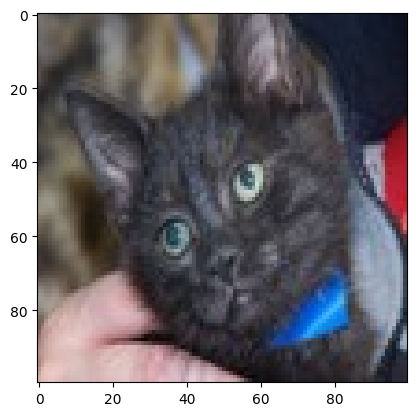

In [ ]:
idx=random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(28, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)       

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history = model.fit(
    datagen.flow(X_train, Y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, Y_test),
    verbose=1)

Epoch 1/30
63/63 [==============================] - 34s 493ms/step - loss: 0.7009 - accuracy: 0.5145 - val_loss: 0.6927 - val_accuracy: 0.5175
Epoch 2/30
63/63 [==============================] - 35s 560ms/step - loss: 0.6921 - accuracy: 0.5195 - val_loss: 0.6867 - val_accuracy: 0.6100
Epoch 3/30
63/63 [==============================] - 36s 565ms/step - loss: 0.6921 - accuracy: 0.5195 - val_loss: 0.6866 - val_accuracy: 0.5550
Epoch 4/30
63/63 [==============================] - 34s 543ms/step - loss: 0.6821 - accuracy: 0.5590 - val_loss: 0.6456 - val_accuracy: 0.6200
Epoch 5/30
63/63 [==============================] - 39s 618ms/step - loss: 0.6787 - accuracy: 0.5775 - val_loss: 0.6364 - val_accuracy: 0.6525
Epoch 6/30
63/63 [==============================] - 37s 572ms/step - loss: 0.6616 - accuracy: 0.5995 - val_loss: 0.6796 - val_accuracy: 0.5825
Epoch 7/30
63/63 [==============================] - 35s 561ms/step - loss: 0.6491 - accuracy: 0.6200 - val_loss: 0.6658 - val_accuracy: 0.6050

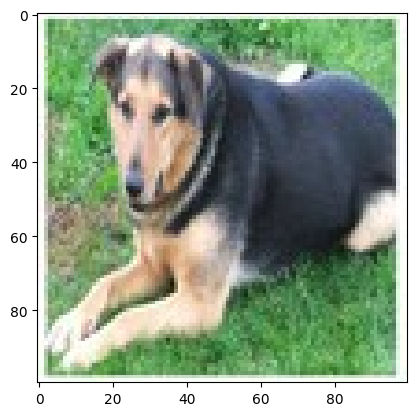

1/1 [==============================] - 1s 720ms/step
Our model says it is a dog


In [ ]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred =model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred=y_pred>0.5

if(y_pred==0):
    pred = 'dog'
else:
    pred='cat'

print("Our model says it is a",pred)

In [ ]:
print('saved model to model.h5')

saved model to model.h5
